# Hackathon 1 - 4th March 2019

## Brief
### Objectives
Create an interactive dashboard showing the following data points:
-  Country
-  Type of Games
-  Medals won split by type
-  Most successful oympics games for a given country by total medals won (strech)

### Success metrics
-  Create working visualisations
-  Use a new visualisation library that I am unfamilar with

#### Data Preperation

In [1]:
#importing all the libraries needed for the hackthon 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bokeh as bkh
%matplotlib inline

In [2]:
#import data for all oympic games from 1896 to present
df_games = pd.read_csv('athlete_events.csv')

In [3]:
#import the regional NOC data
df_noc = pd.read_csv('noc_regions.csv')

In [4]:
#check the games dataset to make numbers are intergers
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df_games.describe

<bound method NDFrame.describe of             ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10           6                     Per Knut Aaland   M  31.0   188.0    75.0   
11    

In [6]:
#check the headings for the noc dataset
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#define the columns we want to drop from the games dataset
columns = ['Name', 'Sex','Age','Height','Weight','City','Event']
df_games = df_games.drop(columns, 1)
df_games

,ID,Team,NOC,Games,Year,Season,Sport,Medal
0,1,China,CHN,1992 Summer,1992,Summer,Basketball,NaN
1,2,China,CHN,2012 Summer,2012,Summer,Judo,NaN
2,3,Denmark,DEN,1920 Summer,1920,Summer,Football,NaN
3,4,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Tug-Of-War,Gold
4,5,Netherlands,NED,1988 Winter,1988,Winter,Speed Skating,NaN
5,5,Netherlands,NED,1988 Winter,1988,Winter,Speed Skating,NaN
6,5,Netherlands,NED,1992 Winter,1992,Winter,Speed Skating,NaN
7,5,Netherlands,NED,1992 Winter,1992,Winter,Speed Skating,NaN
8,5,Netherlands,NED,1994 Winter,1994,Winter,Speed Skating,NaN
9,5,Netherlands,NED,1994 Winter,1994,Winter,Speed Skating,NaN


In [8]:
#replace NaN with a value to denote no medal was won
#games.fillna(0)

In [9]:
#Use Pandas to merge NOC and games 
df_game_noc=pd.merge(df_games,df_noc,how='left', on='NOC')
#drop duplicates
df_game_noc.drop_duplicates(inplace=True,keep=False)
df_game_noc

,ID,Team,NOC,Games,Year,Season,Sport,Medal,region,notes
0,1,China,CHN,1992 Summer,1992,Summer,Basketball,NaN,China,NaN
1,2,China,CHN,2012 Summer,2012,Summer,Judo,NaN,China,NaN
2,3,Denmark,DEN,1920 Summer,1920,Summer,Football,NaN,Denmark,NaN
3,4,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Tug-Of-War,Gold,Denmark,NaN
28,9,Finland,FIN,2002 Winter,2002,Winter,Ice Hockey,NaN,Finland,NaN
29,10,Finland,FIN,1952 Summer,1952,Summer,Swimming,NaN,Finland,NaN
30,11,Finland,FIN,1980 Winter,1980,Winter,Cross Country Skiing,NaN,Finland,NaN
31,12,Finland,FIN,2000 Summer,2000,Summer,Badminton,NaN,Finland,NaN
32,13,Finland,FIN,1996 Summer,1996,Summer,Sailing,NaN,Finland,NaN
33,13,Finland,FIN,2000 Summer,2000,Summer,Sailing,NaN,Finland,NaN


In [10]:
df_medal=df_game_noc.groupby(['region', 'Medal'])['Medal'].count()
df_medal=df_medal.unstack(level=-1,fill_value=0).reset_index()
df_medal.head(50)

Medal,region,Bronze,Gold,Silver
0,Afghanistan,2,0,0
1,Algeria,8,5,2
2,Argentina,91,91,92
3,Armenia,9,2,5
4,Australia,479,305,408
5,Austria,133,91,173
6,Azerbaijan,25,7,12
7,Bahamas,15,12,11
8,Bahrain,1,1,1
9,Barbados,1,0,0


In [11]:
df_medal['Total_Medals'] = df_medal['Bronze'] + df_medal['Silver'] + df_medal['Gold']
df_medal

Medal,region,Bronze,Gold,Silver,Total_Medals
0,Afghanistan,2,0,0,2
1,Algeria,8,5,2,15
2,Argentina,91,91,92,274
3,Armenia,9,2,5,16
4,Australia,479,305,408,1192
5,Austria,133,91,173,397
6,Azerbaijan,25,7,12,44
7,Bahamas,15,12,11,38
8,Bahrain,1,1,1,3
9,Barbados,1,0,0,1


In [12]:
#sort into order of succes
df_medal2 = df_medal.sort_values(['Gold', 'Silver', 'Bronze'], ascending = False)
df_medal2

Medal,region,Bronze,Gold,Silver,Total_Medals
124,USA,1250,2004,1498,4752
99,Russia,1085,1362,1040,3487
41,Germany,1165,1107,1079,3351
123,UK,610,617,696,1923
57,Italy,507,487,494,1488
18,Canada,418,433,414,1265
111,Sweden,498,420,489,1407
38,France,630,418,534,1582
48,Hungary,351,367,301,1019
88,Norway,273,312,329,914


<BarContainer object of 135 artists>

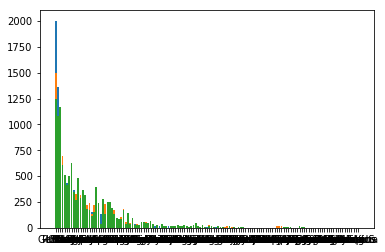

In [13]:
#not stacking but plotting over each occurance
plt.bar(df_medal2.region, df_medal2.Gold)
plt.bar(df_medal2.region, df_medal2.Silver)
plt.bar(df_medal2.region, df_medal2.Bronze)

In [14]:
df_medal3 = df_medal2.nlargest(10, 'Total_Medals', keep='first')
df_medal3

Medal,region,Bronze,Gold,Silver,Total_Medals
124,USA,1250,2004,1498,4752
99,Russia,1085,1362,1040,3487
41,Germany,1165,1107,1079,3351
123,UK,610,617,696,1923
38,France,630,418,534,1582
57,Italy,507,487,494,1488
111,Sweden,498,420,489,1407
18,Canada,418,433,414,1265
4,Australia,479,305,408,1192
48,Hungary,351,367,301,1019


In [33]:
p1 = plt.bar(df_medal3.region, df_medal3.Total_Medals,bars1)
p2 =
plt.ylabel('No. of medals')
plt.title('Top 10 country by total medals')
plt.legend((p1[0],p2[0],p3[0]),('Gold', 'Silver','Bronze'))
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-36130c77c6d2>, line 3)